# Ploteo de los boxplots para ambos sets de datos - Percentiles 90

In [26]:
import pandas as pd # La usamos para manejar la base de datos (y también graficar) https://pandas.pydata.org/docs/
import xarray as xr
import matplotlib.pyplot as plt # Herramienta principal de visualización https://matplotlib.org/stable/contents.html
import matplotlib.dates as mdates # Dentro de matplotlib, tenemos una herramienta para manejo de fechas 
import seaborn as sbn # Herramienta complementaria de visualización https://seaborn.pydata.org/
import numpy as np # Siempre resulta que la usamos


In [27]:
#cargo los datos de CHIRPS y MSWEP
path = f'{workspace}tesis/datos/procesados/'
mswep_file = 'mswep20192022_validacion.nc'
chirps_file = 'chirps20192022_validacion.nc'
pinedo_file = 'pinedo20192022_validacion.nc'
hondo_file = 'hondo20192022_validacion.nc'
angela_file = 'angela20192022_validacion.nc'


ds_mswep = xr.open_dataset(path+mswep_file, engine='netcdf4')
ds_chirps = xr.open_dataset(path+chirps_file, engine='netcdf4')

# Estos son las series temporales para cada una de las estaciones
ds_pinedo = xr.open_dataset(path+pinedo_file, engine='netcdf4')
ds_hondo = xr.open_dataset(path+hondo_file, engine='netcdf4')
ds_angela = xr.open_dataset(path+angela_file, engine='netcdf4')

ds_angela

<xarray.Dataset>
Dimensions:  (time: 1080)
Coordinates:
  * time     (time) datetime64[ns] 2019-02-05 2019-02-06 ... 2022-01-19
Data variables:
    Precip   (time) float64 ...

In [28]:
ds_chirps = ds_chirps.coarsen(latitude = 2, longitude = 2).mean()
ds_chirps = ds_chirps.where(ds_chirps.precip > 1)
ds_mswep = ds_mswep.where(ds_mswep.precipitation > 1)

In [29]:
# me creo las estaciones para MSWEP

ds_mswep_pinedo = ds_mswep.sel(lat=slice(-27.1,-27.3)).sel(lon=slice(-61.3,-61.1))
ds_mswep_hondo = ds_mswep.sel(lat=slice(-27.0,-27.2)).sel(lon=slice(-64.5,-64.3))
ds_mswep_angela = ds_mswep.sel(lat=slice(-27.4,-27.5)).sel(lon=slice(-60.9,-60.8))

#le quito las trazas
ds_mswep_pinedo = ds_mswep_pinedo.where(ds_mswep_pinedo.precipitation > 0.01)
ds_mswep_hondo = ds_mswep_hondo.where(ds_mswep_hondo.precipitation > 0.01)
ds_mswep_angela = ds_mswep_angela.where(ds_mswep_angela.precipitation > 0.01)

#calculo el percentil 90
ds_mswep_pinedo_90 = ds_mswep_pinedo.quantile(0.9, dim='time',keep_attrs=True,skipna=True)
ds_mswep_hondo_90 = ds_mswep_hondo.quantile(0.9, dim='time',keep_attrs=True,skipna=True)
ds_mswep_angela_90 = ds_mswep_angela.quantile(0.9, dim='time',keep_attrs=True,skipna=True)

#me quedo con los mayores al perc_90
ds_mswep_pinedo = ds_mswep_pinedo.where(ds_mswep_pinedo.precipitation > ds_mswep_pinedo_90.precipitation)
ds_mswep_hondo = ds_mswep_hondo.where(ds_mswep_hondo.precipitation > ds_mswep_hondo_90.precipitation)
ds_mswep_angela = ds_mswep_angela.where(ds_mswep_angela.precipitation > ds_mswep_angela_90.precipitation)


#hago el promedio lat y lon
ds_mswep_pinedo_media = ds_mswep_pinedo.mean(dim='lon', skipna=True).mean(dim='lat', skipna=True)
ds_mswep_hondo_media = ds_mswep_hondo.mean(dim='lon', skipna=True).mean(dim='lat', skipna=True)
ds_mswep_angela_media = ds_mswep_angela.mean(dim='lon', skipna=True).mean(dim='lat', skipna=True)


In [30]:
# me creo las estaciones para CHIRPS

ds_chirps_pinedo = ds_chirps.sel(latitude=slice(-27.2,-27.1)).sel(longitude=slice(-61.3,-61.2))
ds_chirps_hondo = ds_chirps.sel(latitude=slice(-27.3,-27.2)).sel(longitude=slice(-64.5,-64.4))
ds_chirps_angela = ds_chirps.sel(latitude=slice(-27.5,-27.4)).sel(longitude=slice(-60.9,-60.8))

#le quito las trazas
ds_chirps_pinedo = ds_chirps_pinedo.where(ds_chirps_pinedo.precip > 1)
ds_chirps_hondo = ds_chirps_hondo.where(ds_chirps_hondo.precip > 1)
ds_chirps_angela = ds_chirps_angela.where(ds_chirps_angela.precip > 1)

#calculo el percentil 90
ds_chirps_pinedo_90 = ds_chirps_pinedo.quantile(0.9, dim='time',keep_attrs=True,skipna=True)
ds_chirps_hondo_90 = ds_chirps_hondo.quantile(0.9, dim='time',keep_attrs=True,skipna=True)
ds_chirps_angela_90 = ds_chirps_angela.quantile(0.9, dim='time',keep_attrs=True,skipna=True)

#me quedo con los mayores al perc_90
ds_chirps_pinedo = ds_chirps_pinedo.where(ds_chirps_pinedo.precip > ds_chirps_pinedo_90.precip)
ds_chirps_hondo = ds_chirps_hondo.where(ds_chirps_hondo.precip > ds_chirps_hondo_90.precip)
ds_chirps_angela = ds_chirps_angela.where(ds_chirps_angela.precip > ds_chirps_angela_90.precip)


#hago el promedio lat lon
ds_chirps_pinedo_media = ds_chirps_pinedo.mean(dim='longitude', skipna=True).mean(dim='latitude', skipna=True)
ds_chirps_hondo_media = ds_chirps_hondo.mean(dim='longitude', skipna=True).mean(dim='latitude', skipna=True)
ds_chirps_angela_media = ds_chirps_angela.mean(dim='longitude', skipna=True).mean(dim='latitude', skipna=True)


In [31]:
# me creo las estaciones para las estaciones
ds_pinedo = ds_pinedo.where(ds_pinedo.Precip > 1)
ds_hondo = ds_hondo.where(ds_hondo['Precip avg'] > 1)
ds_angela = ds_angela.where(ds_angela.Precip > 1)

#calculo el percentil 90
ds_pinedo_90 = ds_pinedo.quantile(0.9, dim='time',keep_attrs=True,skipna=True)
ds_hondo_90 = ds_hondo.quantile(0.9, dim='time',keep_attrs=True,skipna=True)
ds_angela_90 = ds_angela.quantile(0.9, dim='time',keep_attrs=True,skipna=True)

#me quedo con los mayores al perc_90
ds_pinedo = ds_pinedo.where(ds_pinedo.Precip > ds_pinedo_90.Precip)
ds_hondo = ds_hondo.where(ds_hondo['Precip avg'] > ds_hondo_90['Precip avg'])
ds_angela = ds_angela.where(ds_angela.Precip > ds_angela_90.Precip)


## Preparación de los sets de datos para plotearlos

In [32]:
#convierto los dataarrays a numpy arrays para CHIRPS
ds_chirps_pinedo_media_numpy = ds_chirps_pinedo_media.precip.to_numpy()
ds_chirps_hondo_media_numpy = ds_chirps_hondo_media.precip.to_numpy()
ds_chirps_angela_media_numpy = ds_chirps_angela_media.precip.to_numpy()

#quito los nan de los numpy arrays
ds_chirps_pinedo_media_numpy = ds_chirps_pinedo_media_numpy[~np.isnan(ds_chirps_pinedo_media_numpy)]
ds_chirps_hondo_media_numpy = ds_chirps_hondo_media_numpy[~np.isnan(ds_chirps_hondo_media_numpy)]
ds_chirps_angela_media_numpy = ds_chirps_angela_media_numpy[~np.isnan(ds_chirps_angela_media_numpy)]


In [33]:
#convierto los dataarrays a numpy arrays para MSWEP
ds_mswep_pinedo_media_numpy = ds_mswep_pinedo_media.precipitation.to_numpy()
ds_mswep_hondo_media_numpy = ds_mswep_hondo_media.precipitation.to_numpy()
ds_mswep_angela_media_numpy = ds_mswep_angela_media.precipitation.to_numpy()

#quito los nan de los numpy arrays
ds_mswep_pinedo_media_numpy = ds_mswep_pinedo_media_numpy[~np.isnan(ds_mswep_pinedo_media_numpy)]
ds_mswep_hondo_media_numpy = ds_mswep_hondo_media_numpy[~np.isnan(ds_mswep_hondo_media_numpy)]
ds_mswep_angela_media_numpy = ds_mswep_angela_media_numpy[~np.isnan(ds_mswep_angela_media_numpy)]


In [34]:
#convierto los dataarrays a numpy arrays para las estaciones
ds_pinedo_numpy = ds_pinedo.Precip.to_numpy()
ds_hondo_numpy = ds_hondo['Precip avg'].to_numpy()
ds_angela_numpy = ds_angela.Precip.to_numpy()

#quito los nan de los numpy arrays
ds_pinedo_numpy = ds_pinedo_numpy[~np.isnan(ds_pinedo_numpy)]
ds_hondo_numpy = ds_hondo_numpy[~np.isnan(ds_hondo_numpy)]
ds_angela_numpy = ds_angela_numpy[~np.isnan(ds_angela_numpy)]


In [35]:
# me creo el una numpy data array con numpy data arrays
data = [ds_chirps_pinedo_media_numpy, ds_chirps_hondo_media_numpy, ds_chirps_angela_media_numpy, 
        ds_mswep_pinedo_media_numpy, ds_mswep_hondo_media_numpy, ds_mswep_angela_media_numpy, 
        ds_pinedo_numpy, ds_hondo_numpy, ds_angela_numpy]



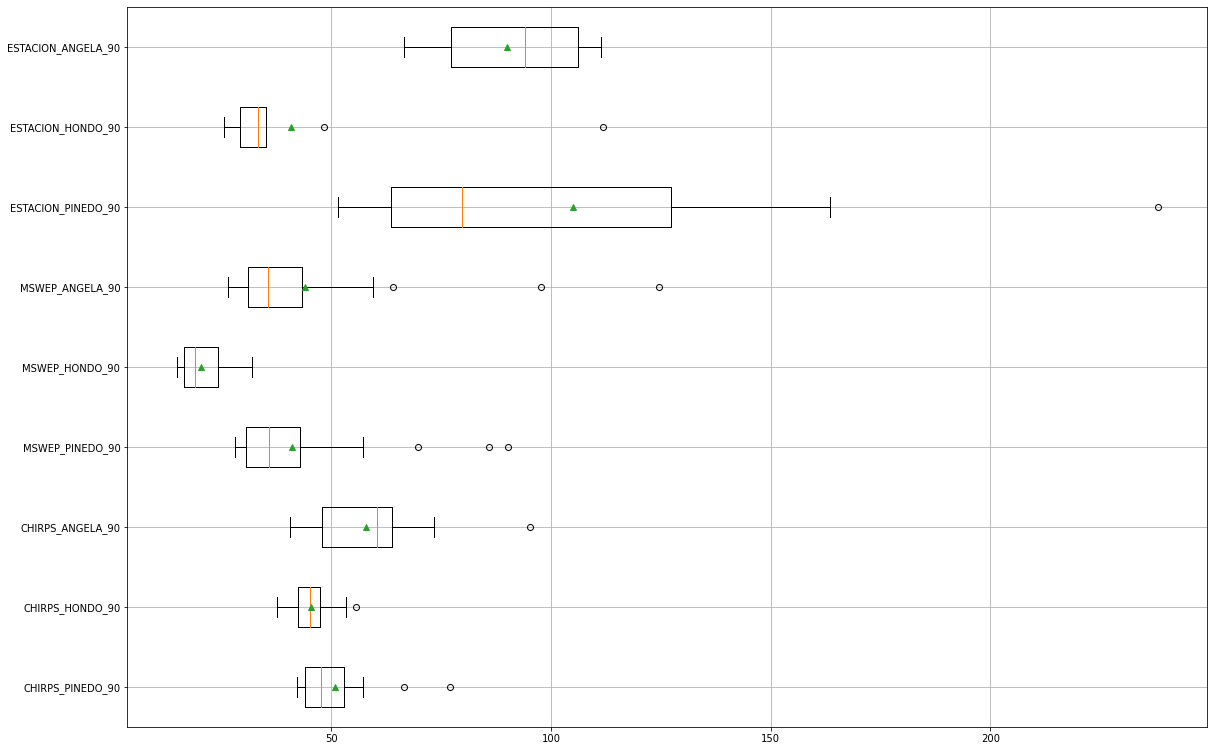

In [38]:
#grafico los boxplots para todos las estaciones y para cada uno de los modelos

fig = plt.figure(figsize =(15, 10))

ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp= ax.boxplot(data, vert=0, showmeans=True)
plt.grid()

ax.set_yticklabels(['CHIRPS_PINEDO_90', 'CHIRPS_HONDO_90', 'CHIRPS_ANGELA_90',
                    'MSWEP_PINEDO_90', 'MSWEP_HONDO_90', 'MSWEP_ANGELA_90',
                   'ESTACION_PINEDO_90', 'ESTACION_HONDO_90', 'ESTACION_ANGELA_90'])
# show plot
plt.show()
